### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

2. Investigate the dataset for missing or problematic data.

In [3]:
pd.set_option('display.max_columns', None)

# DataFrame Shape
original_data_shape = data.shape
print('# Original DataFrame Shape: ' + str(original_data_shape))
print('- - - - - - - - - -\n')

# DataFrame Info
print('# DataFrame Info:')
print(data.info())
print('- - - - - - - - - -\n')

# print the shape of the original dataset
data.shape
print('# Describe:')
print(data.describe())
print('- - - - - - - - - -\n')

# print values counts for each column
print('# Column Value Counts:')
for column in data.columns:
    df = data[column].value_counts(dropna=False).to_frame().reset_index()
    print(df)
    print('- - - - - - - - - -')
print('- - - - - - - - - -\n')

# columns with null values
columns_with_nulls = data.isnull().sum().reset_index()
columns_with_nulls.columns = ['column_name', 'null_count']
columns_with_nulls[columns_with_nulls['null_count'] > 0]
print('# Columns with Null Values:')
print(columns_with_nulls[columns_with_nulls['null_count'] > 0])
print('- - - - - - - - - -\n')

# null value counts by row
user_attributes = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
null_count_by_row = data[user_attributes].isnull().sum(axis=1).to_frame().reset_index()
null_count_by_row.columns = ['row_number', 'null_count']
print('# Row Count of Nulls per Row:')
print(null_count_by_row.groupby('null_count').count())
print('- - - - - - - - - -\n')

# rows with nulls
print('# Rows with Nulls:')
user_attributes_df = data[user_attributes]
rows_with_nulls = user_attributes_df[user_attributes_df.isnull().any(axis=1)]
print(rows_with_nulls.shape[0])
print('- - - - - - - - - -\n')

# search for duplicates
print('# Duplicate Rows:')
print(data[data.duplicated()].shape[0])
print('- - - - - - - - - -\n')

# columns with only one value
columns_unique_values = data.nunique().reset_index()
columns_unique_values.columns = ['column_name', 'unique_count']
print('# Columns With Only One Value:')
print(columns_unique_values[columns_unique_values['unique_count'] ==1])
print('- - - - - - - - - -\n')

# columns with inversely correlated values
print('# Columns with Correlated Values:')
correlated_columns = ['direction_same', 'direction_opp']
for column in correlated_columns:
    df = data[column].value_counts().to_frame().reset_index()
    print(df)
    print('- - - - -')
print('- - - - - - - - - -\n')

# Original DataFrame Shape: (12684, 26)
- - - - - - - - - -

# DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car    

3. Decide what to do about your missing data -- drop, replace, other...

In [4]:
# drop unneeded columns
reprocessed = data.drop(columns=['car', 'direction_opp'])

# find the proportion of Y=1 in rows that have at least 1 'NaN' value
rows_with_NaN = reprocessed.isnull().sum(axis=1).to_frame().reset_index()
rows_with_NaN.columns = ['row_number', 'null_count']
reprocessed['HasNaN'] = rows_with_NaN['null_count'] > 0
has_nan_and_true = reprocessed[(reprocessed['HasNaN'] == True) & (reprocessed['Y'] == 1)]
has_nan = reprocessed[reprocessed['HasNaN'] == True]

print('Ratio of Rows With NaN Instances With Y=1:')
print(round((has_nan_and_true.shape[0] / has_nan.shape[0]), 4))
print()

no_nan_and_true = reprocessed[(reprocessed['HasNaN'] == False) & (reprocessed['Y'] == 1)]
no_nan = reprocessed[reprocessed['HasNaN'] == False]

print('Ratio of Rows Without NaN Instances With Y=1:')
print(round((no_nan_and_true.shape[0] / no_nan.shape[0]), 4))
print()

reprocessed.dropna(axis=0, how='any', inplace=True)
print("Original Shape: " + str(original_data_shape))
print("Reprocessed Shape: " + str(reprocessed.shape))

nan_rows_dropped = original_data_shape[0] - reprocessed.shape[0]
print("NaN rows dropped: " + str(nan_rows_dropped))
print("% rows dropped: " + str(round(100 * nan_rows_dropped/original_data_shape[0], 1)))
print()

# Convert 'age' From object to Integer
age_substitutions = {'below21': '19', '50plus': '55'}
reprocessed['age'] = reprocessed['age'].replace(age_substitutions)
reprocessed['age'] = pd.to_numeric(reprocessed['age'])
print()

# Order Income
ordered_bins = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999','$50000 - $62499', '$62500 - $74999','$75000 - $87499', '$87500 - $99999', '$100000 or More']
reprocessed['income'] = pd.Categorical(reprocessed['income'], ordered_bins)

Ratio of Rows With NaN Instances With Y=1:
0.5504

Ratio of Rows Without NaN Instances With Y=1:
0.5693

Original Shape: (12684, 26)
Reprocessed Shape: (12079, 25)
NaN rows dropped: 605
% rows dropped: 4.8




4. What proportion of the total observations chose to accept the coupon?



In [5]:
accepted_coupon = reprocessed[reprocessed['Y'] == 1]
acceptance_rate = (accepted_coupon.shape[0] / reprocessed.shape[0])
print('Acceptance rate: ' + str(round(acceptance_rate, 3)))

Acceptance rate: 0.569


5. Use a bar plot to visualize the `coupon` column.

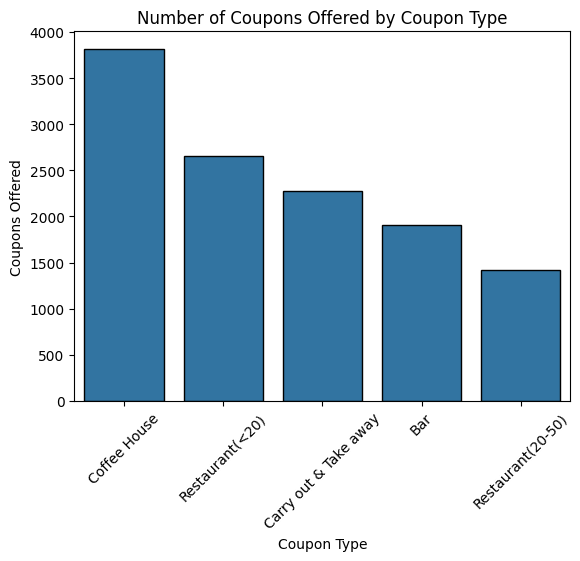

In [6]:
# display seaborn bar plot to visualize coupon column
coupon_counts = reprocessed['coupon'].value_counts()
coupon_counts.columns = ['coupon', 'count']
sns.barplot(data=coupon_counts, edgecolor='black')
plt.title('Number of Coupons Offered by Coupon Type')
plt.xticks(rotation=45)
plt.ylabel('Coupons Offered')
plt.xlabel('Coupon Type')
plt.show()

6. Use a histogram to visualize the temperature column.

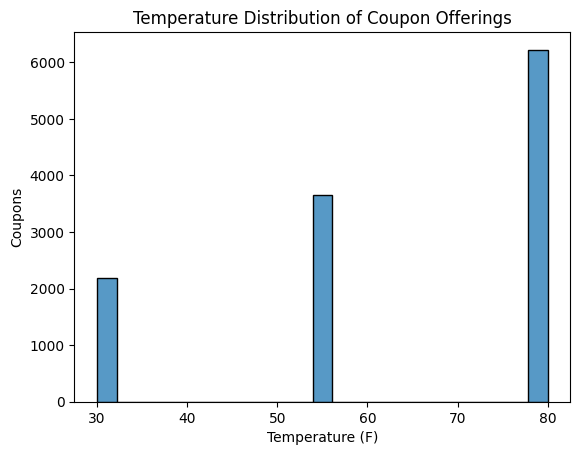

In [7]:
sns.histplot(data=reprocessed, x='temperature')

plt.title('Temperature Distribution of Coupon Offerings')
plt.ylabel('Coupons')
plt.xlabel('Temperature (F)')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [8]:
bar_coupons = reprocessed[reprocessed['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


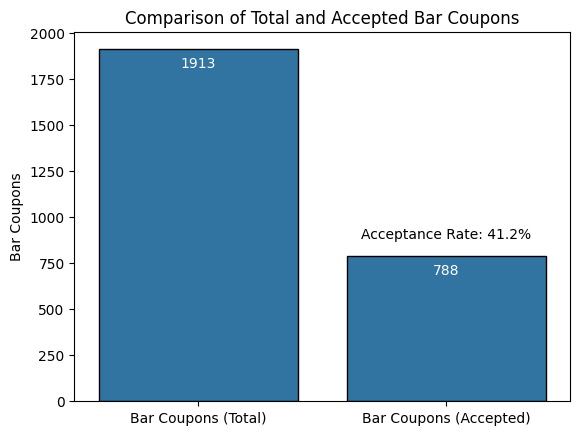

In [9]:
bar_coupons_accepted = bar_coupons[bar_coupons['Y'] == 1].shape[0]
bar_coupons_total = bar_coupons.shape[0]
acceptance_rate = (bar_coupons_accepted / bar_coupons_total)

i = ['Bar Coupons (Total)', 'Bar Coupons (Accepted)']
d = [bar_coupons_total, bar_coupons_accepted]
series = pd.Series(name='Bar Coupons', index=i, data=d)
sns.barplot(data=series, edgecolor='black')
plt.title('Comparison of Total and Accepted Bar Coupons')

# Bar Coupons (Total) text
plt.text(x=0, y=d[0] - 100,
         s=bar_coupons_total,
         ha='center', color='white')

# Bar Coupons (Accepted) text
plt.text(x=1, y=d[1] - 100,
         s=bar_coupons_accepted,
         ha='center', color='white')

plt.text(x=1, y=d[1] + 100,
         s=f"Acceptance Rate: {acceptance_rate:.1%}",
         ha='center', color='black')

plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


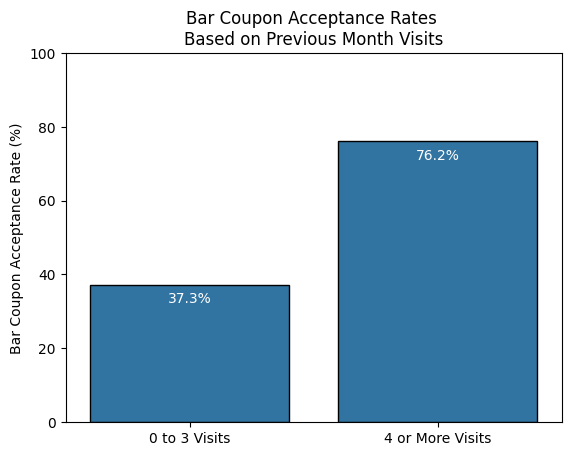

In [10]:
three_or_fewer = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]['Y'].mean() * 100
more_than_four = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]['Y'].mean() * 100

i = ['0 to 3 Visits', '4 or More Visits']
d = [three_or_fewer, more_than_four]
series = pd.Series(name='Bar Coupons', index=i, data=d)
sns.barplot(data=series, edgecolor='black')
plt.title('Bar Coupon Acceptance Rates \nBased on Previous Month Visits')
plt.ylim(0, 100)
plt.ylabel('Bar Coupon Acceptance Rate (%)')

# label: 3 or less visits
plt.text(x=0, y=d[0] - 5,
        s=f"{round(three_or_fewer, 1)}%",
        ha='center', color='white')

# label: 4 or more visits
plt.text(x=1, y=d[1] - 5,
        s=f"{round(more_than_four, 1)}%",
        ha='center', color='white')

plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


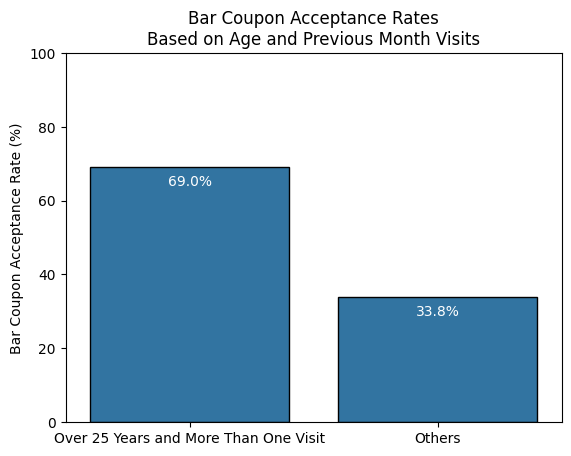

In [11]:
more_than_once_a_month = ['1~3', '4~8', 'gt8']
query = (bar_coupons['Bar'].isin(more_than_once_a_month)) & (bar_coupons['age'] > 25)

more_than_once_over_25_rate = bar_coupons[query]['Y'].mean() * 100
others_rate = bar_coupons[~query]['Y'].mean() * 100

i = ['Over 25 Years and More Than One Visit', 'Others']
d = [more_than_once_over_25_rate, others_rate]
series = pd.Series(name='Bar Coupons', index=i, data=d)
sns.barplot(data=series, edgecolor='black')
plt.ylim(0, 100)
plt.ylabel('Bar Coupon Acceptance Rate (%)')
plt.title('Bar Coupon Acceptance Rates\nBased on Age and Previous Month Visits')

# label: Over 25 Years and More Than One Visit
plt.text(x=0, y=d[0] - 5,
        s=f"{round(more_than_once_over_25_rate, 1)}%",
        ha='center', color='white')

# label: Others
plt.text(x=1, y=d[1] - 5,
        s=f"{round(others_rate, 1)}%",
        ha='center', color='white')

plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


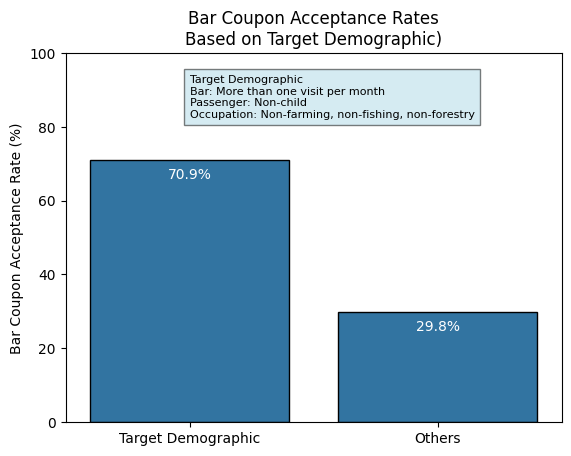

In [12]:
# More than one visit, no child passengers, occupations other than farming, fishing, or forestry
frequency_query = bar_coupons['Bar'].isin(more_than_once_a_month)
passenger_query = ~bar_coupons['passanger'].isin(['Kid(s)'])
occupation_query = ~bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])

target_query = frequency_query & passenger_query & occupation_query
others_query = ~target_query

target_rate = bar_coupons[target_query]['Y'].mean() * 100
others_rate = bar_coupons[others_query]['Y'].mean() * 100

i = ['Target Demographic', 'Others']
d = [target_rate, others_rate]
series = pd.Series(name='Bar Coupons', index=i, data=d)
sns.barplot(data=series, edgecolor='black')
plt.ylim(0, 100)
plt.ylabel('Bar Coupon Acceptance Rate (%)')
plt.title('Bar Coupon Acceptance Rates\nBased on Target Demographic)')

# label: Over 25 Years, More Than One Visit, Non-FFF
plt.text(x=0, y=d[0] - 5,
        s=f"{round(target_rate, 1)}%",
        ha='center', color='white')

# label: Others
plt.text(x=1, y=d[1] - 5,
        s=f"{round(others_rate, 1)}%",
        ha='center', color='white')

# add legend
line1 = 'Target Demographic'
line2 = 'Bar: More than one visit per month'
line3 = 'Passenger: Non-child'
line4 = 'Occupation: Non-farming, non-fishing, non-forestry'
legend_text = f'{line1}\n{line2}\n{line3}\n{line4}'
plt.text(0, 82.5, legend_text, fontsize=8, bbox=dict(facecolor='lightblue', alpha=0.5))

plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [13]:
# Query1: go to bars more than once a month, had passengers that were not a kid, and were not widowed
frequency_query1 = bar_coupons['Bar'].isin(more_than_once_a_month)
passenger_query1 = ~bar_coupons['passanger'].isin(['Kid(s)'])
marital_query1 = ~bar_coupons['maritalStatus'].isin(['Widowed'])

query1 = frequency_query1 & passenger_query1 & marital_query1

query1_rate = bar_coupons[query1]['Y'].mean() * 100

In [14]:
# Query2: go to bars more than once a month and are under the age of 30
frequency_query2 = bar_coupons['Bar'].isin(more_than_once_a_month)
age_query2 = bar_coupons['age'] < 30

query2 = frequency_query2 & age_query2

query2_rate = bar_coupons[query2]['Y'].mean() * 100

In [15]:
# Query3: go to cheap restaurants more than 4 times a month and income is less than 50K
more_than_4x_a_month = ['4~8', 'gt8']
income_less_than_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

frequency_query3 = bar_coupons['RestaurantLessThan20'].isin(more_than_4x_a_month)
income_query3 = bar_coupons['income'].isin(income_less_than_50k)

query3 = frequency_query3 & income_query3

query3_rate = bar_coupons[query3]['Y'].mean() * 100

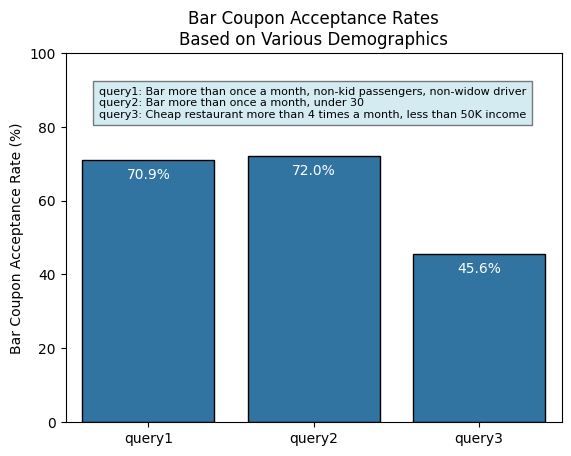

In [16]:
i = ['query1', 'query2', 'query3']
d = [query1_rate, query2_rate, query3_rate]
series = pd.Series(name='Bar Coupons', index=i, data=d)
sns.barplot(data=series, edgecolor='black')
plt.ylim(0, 100)
plt.ylabel('Bar Coupon Acceptance Rate (%)')
plt.title('Bar Coupon Acceptance Rates\nBased on Various Demographics')

# label: go to bars more than once a month, had passengers that were not a kid, and were not widowed
plt.text(x=0, y=d[0] - 5,
        s=f"{round(query1_rate, 1)}%",
        ha='center', color='white')

# label: go to bars more than once a month and are under the age of 30
plt.text(x=1, y=d[1] - 5,
        s=f"{round(query2_rate, 1)}%",
        ha='center', color='white')

# label: go to cheap restaurants more than 4 times a month and income is less than 50K
plt.text(x=2, y=d[2] - 5,
        s=f"{round(query3_rate, 1)}%",
        ha='center', color='white')

# add legend
query1_text = 'query1: Bar more than once a month, non-kid passengers, non-widow driver'
query2_text = 'query2: Bar more than once a month, under 30'
query3_text = 'query3: Cheap restaurant more than 4 times a month, less than 50K income'
legend_text = f'{query1_text}\n{query2_text}\n{query3_text}'
plt.text(-0.30, 82.5, legend_text, fontsize=8, bbox=dict(facecolor='lightblue', alpha=0.5))

plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who have accepted the bar coupon have a history of visiting bars at least one time in the previous month.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Independent Investigation
## Question
Coupons for higher priced restaurants ($20-50 per person) have the second lowest coupon acceptance rate at 44.6%. What purchase history characteristics have the biggest differences between the upscale restaurant coupon rejectors and acceptors which might provide guidance on how to improve the acceptance rate for upscale coupons?

## Procedure
This investigatation involves looking at the entire purchase history (Bar, Coffee House, Restaurants and Take Out) for customers issued upscale restaurant coupons. The goal is to determine if there is a pattern in the customer's purchasing behavior that distinguishes upscale restaurant coupon rejectors from acceptors.

The procedure is to calculate the mean probabilities of each purchase history category represented by the Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50 columns for coupon rejectors and acceptors and compare the results.

1. Calculate Upscale Coupon Acceptance Rates
2. Calculate Purchase History Probabilities for Coupon Rejectors and Acceptors
3. Compare Differences between Coupon Rejectors and Acceptors
4. Analysis
5. Conclusion

# 1. Calculate Upscale Restaurant Coupon Acceptance Rates

In [17]:
# What are the upscale restaurant coupon acceptance rates?
coupon_df = reprocessed.groupby('coupon')['Y'].agg(['mean', 'count'])
coupon_df.columns = ['Acceptance Rate', 'Count (Total)']
coupon_df.sort_values(by='Acceptance Rate', ascending=False, inplace=True)
coupon_df

,Acceptance Rate,Count (Total)
coupon,,
Carry out & Take away,0.737719,2280
Restaurant(<20),0.709009,2653
Coffee House,0.496331,3816
Restaurant(20-50),0.446013,1417
Bar,0.411918,1913


# 2. Calculate Purchase History Probabilities for Coupon Rejectors and Acceptors

In [18]:
def GetPurchaseHistoryDistribution(coupon, data):
    '''
    Creates a dataframe containing the purchase history probability distribution for each
    food establishment type for a user that received the specified coupon.

    Parameters:
    coupon: the coupon type from the "coupon" column.
    data: the dataframe containing the coupon data.

    Returns:
    A dataframe containing the purchase history distribution for each food establishment type.
    '''
    coupon_data = data.copy()
    coupon_data.reset_index(inplace=True)
    coupon_data = coupon_data[coupon_data['coupon'] == coupon]

    history_column_names = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
    history_dfs = [] # purchase history probability distribution dataframes for each category

    for column_name in history_column_names:
        melt_df = coupon_data.melt(id_vars=['index'], value_vars=[column_name])
        history_df = (melt_df.groupby('value').agg('count') / coupon_data.shape[0]) * 100

        history_df.drop(columns=['index'], inplace=True)
        history_df.columns = [column_name]
        history_dfs.append(history_df)

    merged_df = pd.merge(history_dfs[0], history_dfs[1], on='value', how='inner')

    for column_index in range(2, len(history_column_names)):
        merged_df = pd.merge(merged_df, history_dfs[column_index], on='value', how='inner')

    result_df = merged_df.T.rename_axis('Purchase History Category')
    result_df = result_df[['never', 'less1', '1~3', '4~8',	'gt8']]

    return result_df

In [19]:
# Use the GetPurchaseHistoryDistribution() function to get the purchase history
# probability distributions for accepted and rejected coupon scenarios
coupon = 'Restaurant(20-50)'
accept_coupon = reprocessed[(reprocessed['coupon'] == coupon) & (reprocessed['Y'] == 1)]
reject_coupon = reprocessed[(reprocessed['coupon'] == coupon) & (reprocessed['Y'] == 0)]

accept_coupon.reset_index(inplace=True)
reject_coupon.reset_index(inplace=True)

accept_coupon_history = GetPurchaseHistoryDistribution(coupon, accept_coupon)
reject_coupon_history = GetPurchaseHistoryDistribution(coupon, reject_coupon)

# get the difference of the probability distributions between
# rejecting/accepting the Restaurant(20-50) coupon
diff_coupon_history = reject_coupon_history - accept_coupon_history

# 3. Compare Differences between Coupon Rejectors and Acceptors

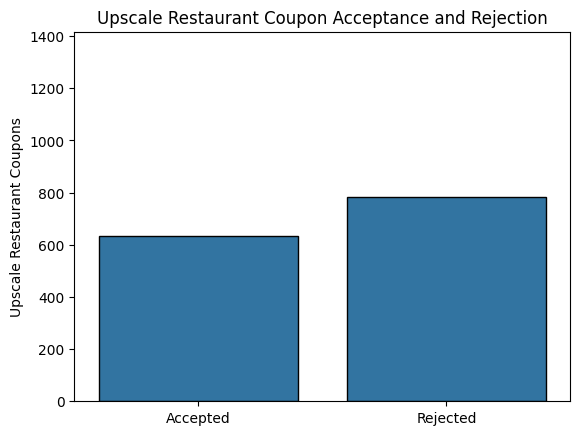

In [20]:
i = ['Accepted', 'Rejected']
d = [accept_coupon.shape[0], reject_coupon.shape[0]]
series = pd.Series(name='Upscale Restaurant Coupons', index=i, data=d)

sns.barplot(data=series, edgecolor='black')
plt.ylim(0, accept_coupon.shape[0] + reject_coupon.shape[0])
plt.title('Upscale Restaurant Coupon Acceptance and Rejection')
plt.show()

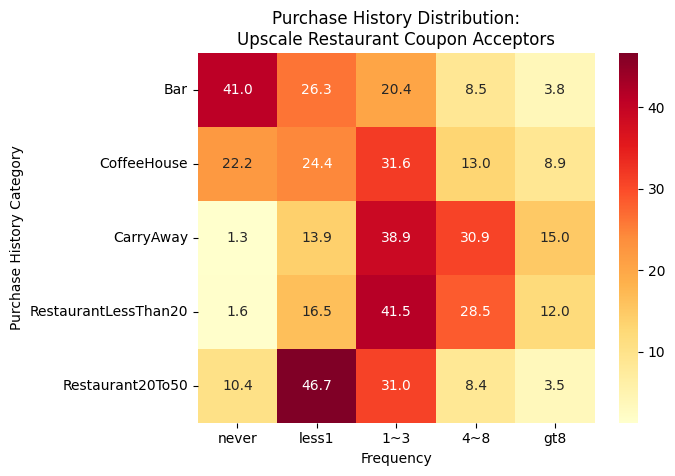

In [21]:
sns.heatmap(accept_coupon_history, annot=True, cmap="YlOrRd", fmt=".1f")
plt.xlabel('Frequency')
plt.title('Purchase History Distribution:\nUpscale Restaurant Coupon Acceptors')
plt.show()

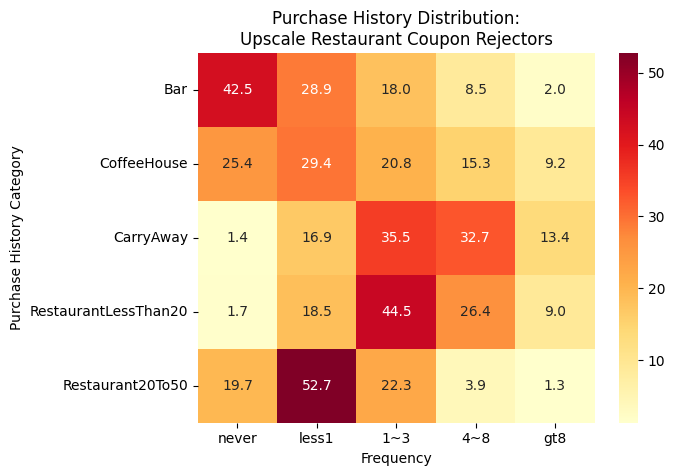

In [22]:
sns.heatmap(reject_coupon_history, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title('Purchase History Distribution:\nUpscale Restaurant Coupon Rejectors')
plt.xlabel('Frequency')
plt.show()

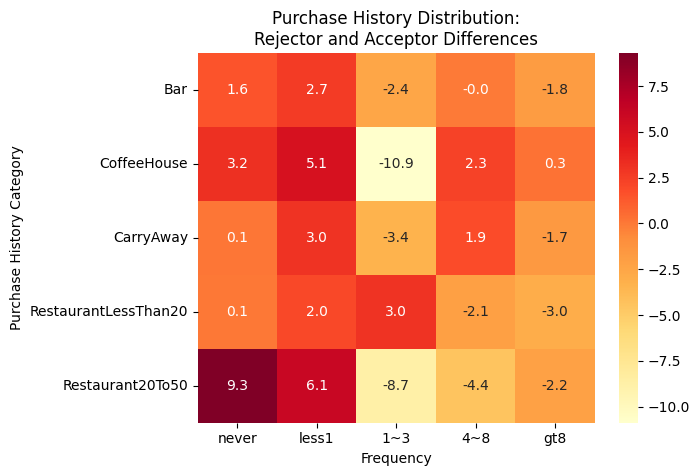

In [23]:
sns.heatmap(diff_coupon_history, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title('Purchase History Distribution:\nRejector and Acceptor Differences')
plt.xlabel('Frequency')
plt.show()

# 4. Analysis
The heatmap for upscale restaurant coupon acceptors shows the mean probability distributions for purchase history categories (Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50). For example, among coupon acceptors, 24.4% reported visiting a coffee house less than once per month. Notable observations include higher probabilities for never visiting bars (41%), dining at cheaper restaurants 1-3 times per month (41.5%), and visiting upscale restaurants less than once per month (46.7%).

Similarly, the heatmap for coupon rejectors highlights comparable patterns. For instance, rejectors are also likely to report never going to bars (42.5%) and visiting upscale restaurants less than once per month (52.7%).

The difference heatmap, calculated by subtracting acceptor probabilities from rejector probabilities, reveals the following key disparities:
* Rejectors are 9.3% more likely to never visit upscale restaurants.
* Rejectors are 8.7% less likely to visit upscale restaurants 1-3 times per month.
* Rejectors are 10.9% less likely to visit coffee houses 1-3 times per month.
This difference heatmap suggests that rejectors tend to engage less frequently with food establishments, as indicated by higher probabilities for "never" or less frequent engagements with such venues.


# 5. Conclusion
The purchase history differences between upscale restaurant coupon acceptors and rejectors are not particularly pronounced, offering little actionable insight to improve coupon acceptance rates.

For example, if rejectors frequented coffee houses more often, a targeted campaign could increase adoption. However, the findings suggest limited influence of past engagement on coupon acceptance. Future analyses should explore other dataset features for opportunities. While this investigation did not identify ways to improve engagement, comparing probability distributions of different customer behavior sets is a viable technique for uncovering insights.